In [1]:
# importa os pacotes necessários
import numpy as np
import os, cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
#seleciona o modelo
from keras_segmentation.pretrained import pspnet_101_cityscapes,pspnet_101_voc12,pspnet_50_ADE_20K
model = pspnet_101_voc12() 

Using TensorFlow backend.
W1207 08:43:47.345920 140389311887168 deprecation_wrapper.py:119] From /home/cordeiro/env/py3im/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1207 08:43:56.234250 140389311887168 deprecation_wrapper.py:119] From /home/cordeiro/env/py3im/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4074: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W1207 08:43:56.312481 140389311887168 deprecation_wrapper.py:119] From /home/cordeiro/env/py3im/lib/python3.6/site-packages/keras_segmentation/models/_pspnet_2.py:37: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.



W1207 08:44:03.017097 140389311887168 deprecation_wrapper.py:119] From /home/cordeiro/env/py3im/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



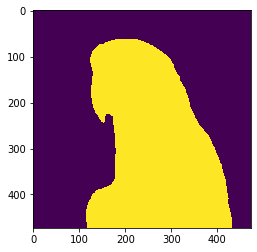

In [3]:
#segmenta
img_name = 'arara'
out = model.predict_segmentation(
    inp="imgs/in/"+img_name+".jpg",
    out_fname="imgs/mask/"+img_name+"_seg.jpg"
)
plt.imshow(out)

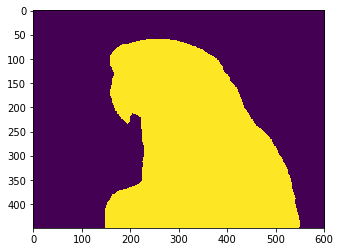

In [4]:
#resize
img_in = cv2.imread("imgs/in/"+img_name+".jpg")
out = cv2.resize(out,(img_in.shape[1],img_in.shape[0]),interpolation=cv2.INTER_NEAREST)
plt.imshow(out)

In [5]:
#seleciona o elemento mais frequente e que esta mais no centro
s = out.shape
out_sem_borda = out[int(s[0]*0.15):int(s[0]*0.85),int(s[1]*0.15):int(s[1]*0.85)].copy()
lista = out_sem_borda.flatten().tolist()
elemento_mais_freq = max(set(lista), key=lista.count)
elemento_mais_freq

3

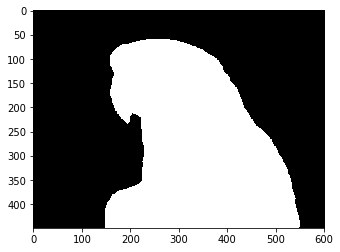

In [6]:
#cria mascara
mask = np.zeros(out.shape)
mask[out == elemento_mais_freq] = 255
cv2.imwrite("imgs/mask/"+img_name+"_bin.jpg",mask)
plt.imshow(mask,cmap='gray')

## Em uma única função

In [7]:
def segmenta(img_name,model):
    
    #segmenta
    out = model.predict_segmentation(
        inp="imgs/in/"+img_name+".jpg",
        out_fname="imgs/mask/"+img_name+"_seg.jpg"
    )
    
    #resize
    img_in = cv2.imread("imgs/in/"+img_name+".jpg")
    out = cv2.resize(out,(img_in.shape[1],img_in.shape[0]),interpolation=cv2.INTER_NEAREST)
    
    #seleciona o elemento mais frequente e que esta mais no centro
    s = out.shape
    out_sem_borda = out[int(s[0]*0.15):int(s[0]*0.85),int(s[1]*0.15):int(s[1]*0.85)].copy()
    lista = out_sem_borda.flatten().tolist()
    elemento_mais_freq = max(set(lista), key=lista.count)

    #cria mascara
    mask = np.zeros(out.shape)
    mask[out == elemento_mais_freq] = 255
    cv2.imwrite("imgs/mask/"+img_name+"_bin.jpg",mask)
    
    return mask

In [8]:
from keras_segmentation.pretrained import pspnet_101_voc12
model = pspnet_101_voc12() 

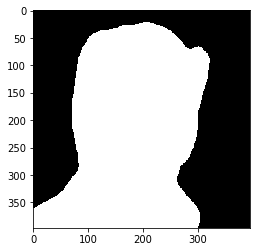

In [10]:
mask = segmenta("elon",model)
plt.imshow(mask,cmap='gray')